### Import data

In [1]:
import csv
with open('2-breast-cancer-wisconsin.data', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)


### Data cleanup

In [2]:
#convert fields from string to int
for row in range(len(dataset)):
    for column in range(len(dataset[row])):
        if dataset[row][column] != '?':
            dataset[row][column] = int(dataset[row][column])
            
# calculate mean, max, min for each column to be used later
number_of_columns = len(dataset[0])
number_of_rows = len(dataset)
meanval = minval = maxval = list()
for column in range(number_of_columns):
    total = 0
    min = 10
    max = 0
    for row in range(number_of_rows):
        value = dataset[row][column]
        if (value != '?'):
            total += value
            if (value<min): 
                min=value
            if (value>max): 
                max=value
    meanval.append(round(total/number_of_rows,0))
    minval.append(min)
    maxval.append(max)
    
# replace missing data with mean
for row in range(len(dataset)):
    for column in range(len(dataset[row])):
        if dataset[row][column] == '?':
                dataset[row][column] = meanval[column]

#convert object to dataframe
from pandas import DataFrame
columnnames = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',  'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
df = DataFrame(dataset,columns=columnnames)

features = df.drop(columns=['Sample code number', 'Class'])
labels = df["Class"]

### Data visualization

In [3]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [4]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.532189,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.602774,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

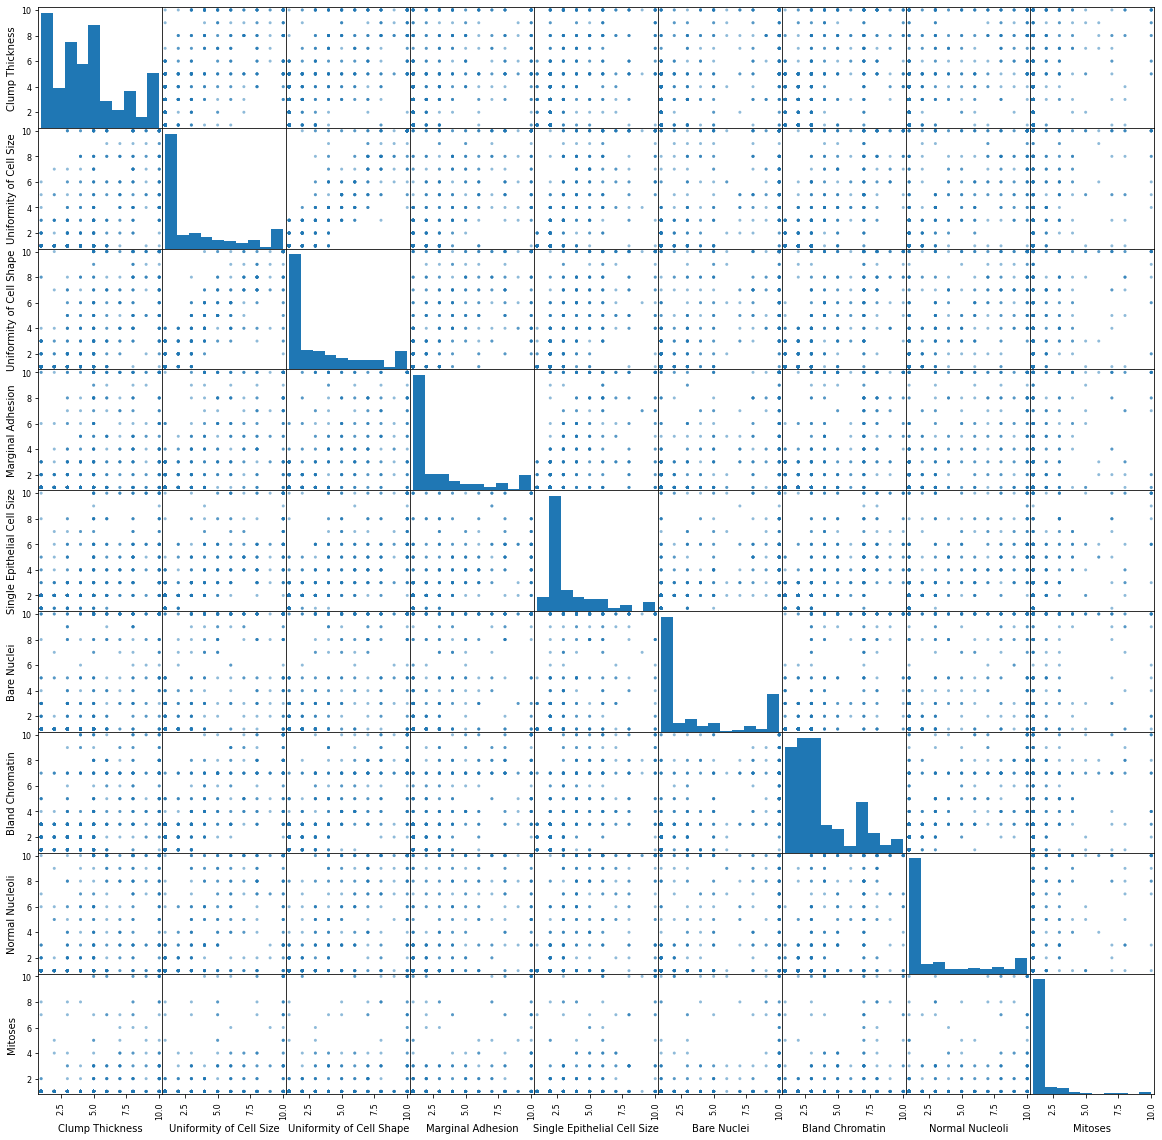

In [5]:
# Display the data in a scatter matrix
from pandas.plotting import scatter_matrix
p=scatter_matrix(features,figsize=(20, 20))

<AxesSubplot:>

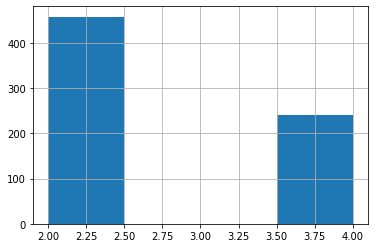

In [6]:
labels.hist(bins=4)

### Test normalizing the data (didn't help)

c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\u1\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

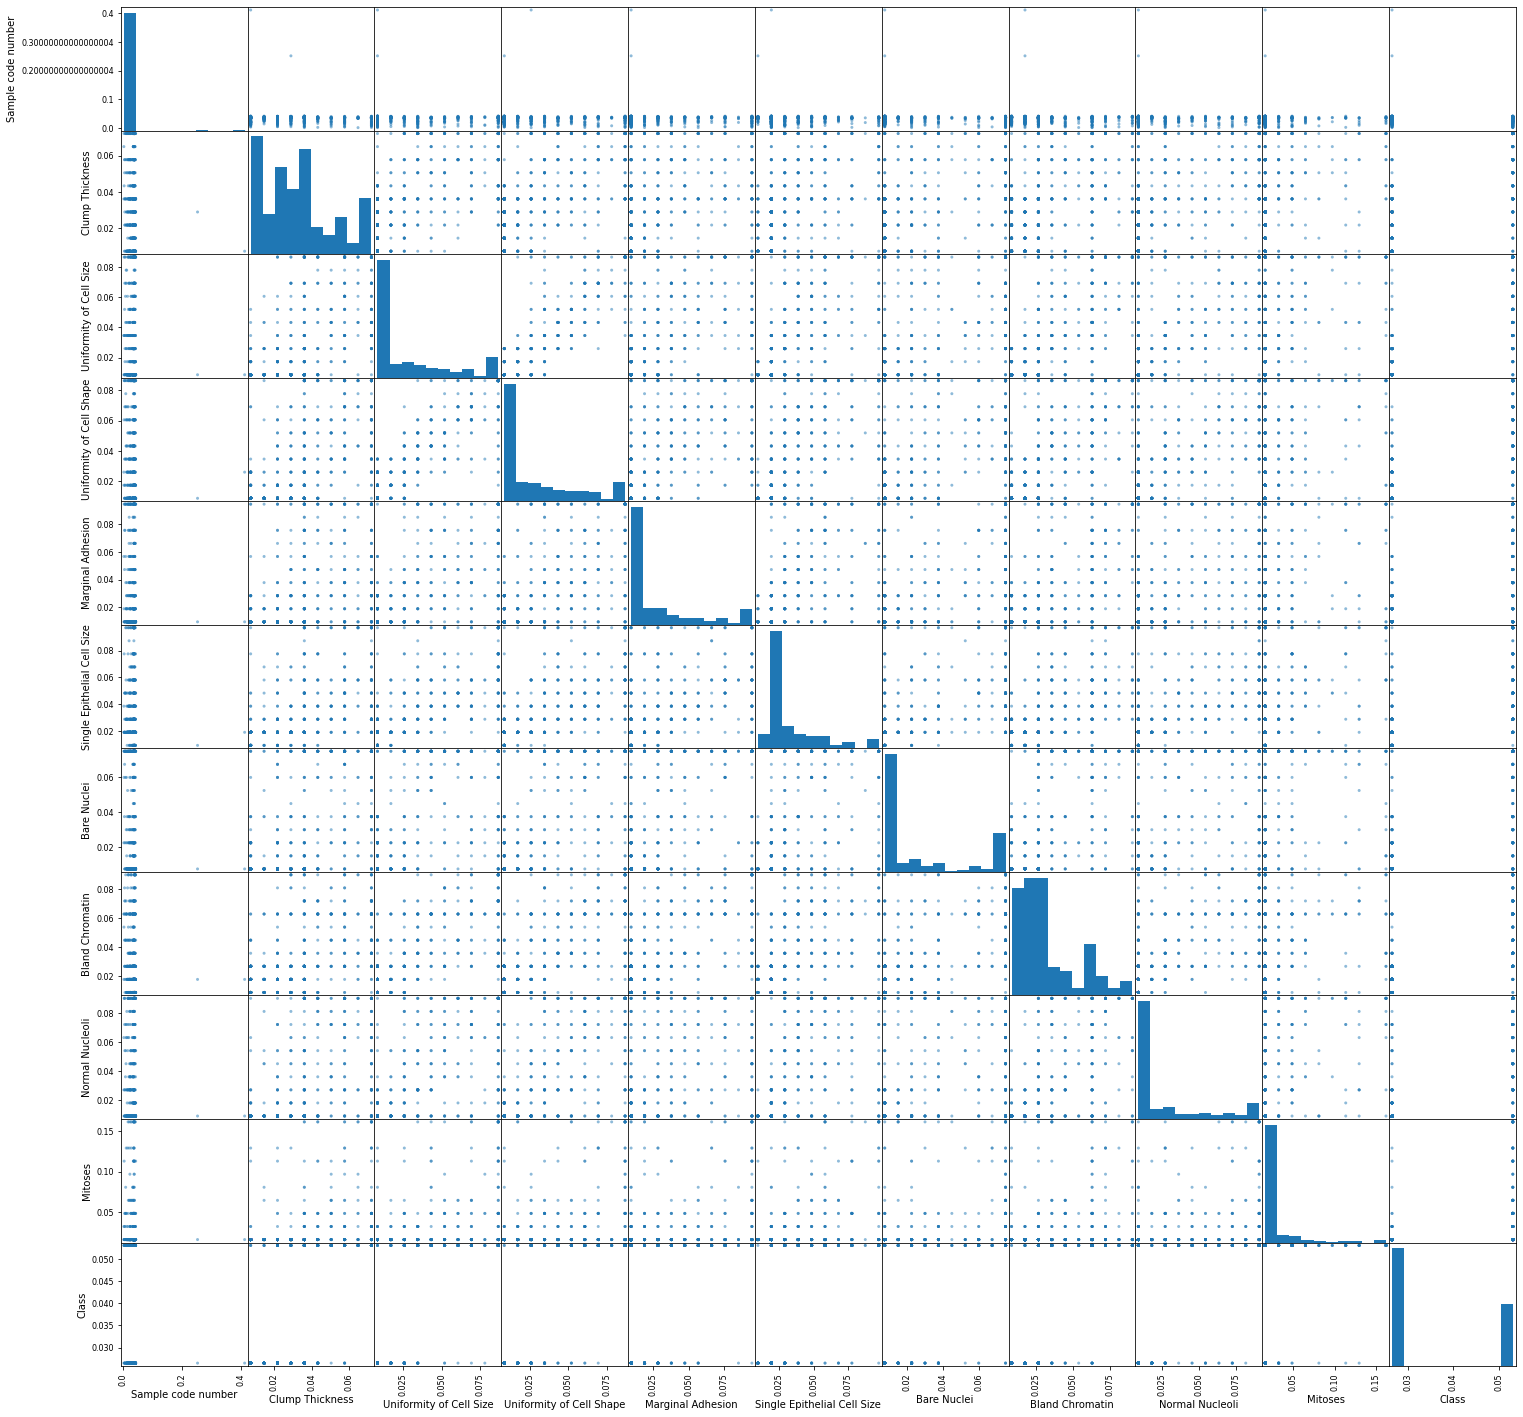

In [7]:
from sklearn import preprocessing
import pandas as pd

d = preprocessing.normalize(df, axis=0)
scaled_df = pd.DataFrame(d, columns=columnnames)

g = scatter_matrix(scaled_df,figsize=(25, 25))

### Train and validate the model

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix

features_train_val, features_test, labels_train_val, labels_test = train_test_split(features, labels, test_size=0.1, random_state=1)

testparams = [['linear', 1, 'auto'], 
              ['rbf', 1, 0.001], 
              ['rbf', 1, 0.0001], 
              ['rbf', 10, 0.001],
              ['rbf', 10, 0.0001],
              ['rbf', 100, 0.001],
              ['rbf', 100, 0.0001]]

score = ['accuracy', 'f1_macro', 'roc_auc']

tableheader = ["Test #", "Kernel", "C", "Gamma", "Accuracy(avg)", "F1 Score(avg)", "ROC_AUC(avg)"]
tabledata = list()
format_row = "{:<15}" * (len(tableheader))
print(format_row.format(*tableheader))

for i, testparam in enumerate(testparams):
    svc = SVC(kernel=testparam[0], C=testparam[1], gamma=testparam[2])
    scores = cross_validate(svc, features_train_val, labels_train_val, cv=5, scoring=score)
    tabledata.append((i+1, testparam[0], testparam[1], testparam[2], 
                      str(round(scores["test_accuracy"].mean(), 3)) + " std:" + str(round(scores["test_accuracy"].std(), 2)), 
                      str(round(scores["test_f1_macro"].mean(), 3)) + " std:" + str(round(scores["test_f1_macro"].std(), 2)),
                      str(round(scores["test_roc_auc"].mean(), 3)) + " std:" + str(round(scores["test_roc_auc"].std(), 2))))

for row in tabledata:
    print(format_row.format(*row))

Test #         Kernel         C              Gamma          Accuracy(avg)  F1 Score(avg)  ROC_AUC(avg)   
1              linear         1              auto           0.957 std:0.01 0.953 std:0.01 0.993 std:0.01 
2              rbf            1              0.001          0.965 std:0.01 0.961 std:0.01 0.994 std:0.0  
3              rbf            1              0.0001         0.962 std:0.01 0.958 std:0.01 0.994 std:0.0  
4              rbf            10             0.001          0.96 std:0.01  0.956 std:0.01 0.994 std:0.0  
5              rbf            10             0.0001         0.965 std:0.01 0.961 std:0.01 0.994 std:0.0  
6              rbf            100            0.001          0.957 std:0.02 0.952 std:0.02 0.991 std:0.01 
7              rbf            100            0.0001         0.96 std:0.01  0.956 std:0.01 0.994 std:0.01 


### Test the model

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

testparam = ['rbf', 1, 0.001]

svc = SVC(kernel=testparam[0], C=testparam[1], gamma=testparam[2])
scores = cross_validate(svc, features_train_val, labels_train_val, cv=5)
fit = svc.fit(features_train_val, labels_train_val)
predictions = svc.predict(features_test)

print("\nConfusion matrix:")
print(confusion_matrix(labels_test,predictions))
print("\nClassification report:")
print(classification_report(labels_test,predictions))


Confusion matrix:
[[45  1]
 [ 2 22]]

Classification report:
              precision    recall  f1-score   support

           2       0.96      0.98      0.97        46
           4       0.96      0.92      0.94        24

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70

